# TP Semanal 7

## Herramientas de simulación

In [20]:
# Modulos que voy a usar durante la TS7
import numpy as np
from scipy import signal as sig
import matplotlib.pyplot as plt

In [21]:
"""
Clase para plotear sistenmas digitales
Recibe como argumento el numerador y denominador de la transferencia
Tiene metodos para plotear:
-Diagrama de polos y ceros
-Respuesta en modulo
-Respuesta en fase
-Retardo de grupo
"""
class SysZ():
    """
    Constructor, calcula todos los paramtros del sistema
    """
    def __init__(self, numz, denz, fs):
        #Guardo fs
        self.fs=fs

        #Calculo polos y ceros
        system = sig.TransferFunction(numz, denz, dt=1/fs)
        self.poles = system.poles
        self.zeros = system.zeros

        # Calculo la respuesta de frecuencia en el dominio Z
        self.w, self.h = sig.freqz(numz, denz, fs=fs)

        # Calculo la magnitud, fase y retardo de grupo
        self.mag = np.abs(self.h)
        self.phase = np.angle(self.h)
        self.group_delay = -np.diff(self.phase) / np.diff(self.w)

    """
    Plotea diagrama de polos y ceros
    verbose: imprime los polos y ceros (opcion por default true)
    xlim: limites en x, se pasa en forma de tupla (por default -2,2)
    ylim: limites en y, se pasa en forma de tupla (por default -2,2)
    """
    def printPZMap(self, verbose=True, xlim=None, ylim=None):
        # Contar la multiplicidad de los polos y ceros
        unique_poles = np.unique(self.poles)
        unique_zeros = np.unique(self.zeros)
        pole_multiplicity = [np.count_nonzero(self.poles == p) for p in unique_poles]
        zero_multiplicity = [np.count_nonzero(self.zeros == z) for z in unique_zeros]

        # Crear una gráfica para el diagrama de polos y ceros
        plt.figure(figsize=(8, 8))
        plt.scatter(np.real(self.poles), np.imag(self.poles), marker='x', label='Polos', color='red')
        plt.scatter(np.real(self.zeros), np.imag(self.zeros), marker='o', label='Ceros', color='blue')

        # Dibujar el círculo de radio unitario en línea punteada
        circle = plt.Circle((0, 0), 1, fill=False, linestyle='--', color='green', label='Círculo Unitario')
        plt.gca().add_patch(circle)

        # Etiquetar los polos con multiplicidad mayor a 1
        for i, (pole, multiplicity) in enumerate(zip(unique_poles, pole_multiplicity)):
            if multiplicity > 1:
                plt.annotate(f'{multiplicity}', (np.real(pole)+.03, np.imag(pole)+.03), fontsize=10, color='red')

        # Etiquetar los ceros con multiplicidad mayor a 1
        for i, (zero, multiplicity) in enumerate(zip(unique_zeros, zero_multiplicity)):
            if multiplicity > 1:
                plt.annotate(f'{multiplicity}', (np.real(zero)+.03, np.imag(zero)+.03), fontsize=10, color='blue')

        plt.title('Diagrama de Polos y Ceros')
        plt.xlabel('Parte Real')
        plt.ylabel('Parte Imaginaria')
        plt.axhline(0, color='black', linestyle='--')  # Línea horizontal para el eje real
        plt.axvline(0, color='black', linestyle='--')  # Línea vertical para el eje imaginario

        #Limites configurables
        if(xlim==None):
            xlim=(-2, 2)
        if(ylim==None):
            ylim=(-2, 2)
        plt.xlim(xlim[0],xlim[1])
        plt.ylim(ylim[0],ylim[1])

        #Plot
        plt.legend()
        plt.grid(True)
        plt.show()
        if(verbose):
            print("Polos:")
            print(self.poles)
            print("Zeros:")
            print(self.zeros)

    """
    Plotea respuesta en mópdulo
    ylim: limites en Y, se pasa en forma de tupla (opcional)
    """
    def printModule(self, ylim=None):
        plt.figure(figsize=(12, 4))
        plt.semilogx(self.w, 20 * np.log10(self.mag))
        plt.title('Respuesta de magnitud')
        plt.xlabel('Frecuencia angular discreta [radianes]')
        plt.ylabel('Magnitud [dB]')
        if(ylim!=None):
            plt.ylim(ylim[0],ylim[1])
        plt.grid()
        plt.tight_layout()
        plt.show()

    """
    Plotea respuesta en fase
    ylim: limites en Y, se pasa en forma de tupla (opcional)
    """
    def printPhase(self, ylim=None):
        plt.figure(figsize=(12, 4))
        plt.semilogx(self.w, np.degrees(self.phase))
        plt.title('Respuesta de fase')
        plt.xlabel('Frecuencia angular discreta [radianes]')
        plt.ylabel('Fase [grados]')
        if(ylim==None):
            ylim=(-180,180)
        plt.ylim(ylim[0],ylim[1])
        plt.grid()
        plt.tight_layout()
        plt.show()

    """
    Plotea retardo de grupo
    ylim: limites en Y, se pasa en forma de tupla (opcional)
    """
    def printGroupDelay(self, ylim=None):
        plt.figure(figsize=(12, 4))
        plt.semilogx(self.w[:-1], self.group_delay)
        plt.title('Retardo de grupo')
        plt.xlabel('Frecuencia angular discreta [radianes]')
        plt.ylabel('Retardo de grupo [muestras]')
        if(ylim!=None):
            plt.ylim(ylim[0],ylim[1])
        plt.grid()
        plt.tight_layout()
        plt.show()

## Ejercicio 1
Se desea emular digitalmente la característica de un filtro analógico pasa bajos Butterworth de
orden 2, con 𝑓𝑐 = 1 𝑘𝐻𝑧

A. Para 𝑓𝑠 = 100 𝑘𝐻𝑧 y aplicando transformación bilineal, obtener un filtro con respuesta 𝐻(𝑧) cuyo comportamiento emule al Butterworth analógico.
Trazar la respuesta en frecuencia de módulo y fase de ambos filtros sobre un mismo gráfico para establecer comparaciones.

B. Repetir el punto anterior para 𝑓𝑠 = 10 𝑘𝐻𝑧

C. Repetir los puntos A) y B) si se desea emular digitalmente la característica de un filtro analógico pasa altos Butterworth de orden 2, con 𝑓𝑐 = 6 𝑘𝐻𝑧

D. Indique en cuál de los 3 casos ( A, B ó C ) justificaría rediseñar aplicando prewarping. Explique el motivo en pocas palabras.



### Diseño filtros Butter Pasa Bajos y Pasa altos Analógicos

#### Armo transferencia analógica:

- Para filtros pasa-bajos
wc=1kHz

Primero ws=100kHz

Luego cambio ws=10kHz

- Para filtros pasa-altos
wc=6kHz

Priemro ws=100kHz

Luego cambio ws=10kHz

Diseño filtro Butterworth, al ser maxima planicidad Q=1/sqrt(2):
- Filtro pasabajos pasa-bajos:
\begin{equation}
H(\$) = \cfrac{wc^{2}}{\$^{2}+wc\sqrt{2}+wc^{2}}
\end{equation}

- Filtro pasabajos pasa-altos:
\begin{equation}
H(\$) = \cfrac{\$^{2}}{\$^{2}+wc\sqrt{2}+wc^{2}}
\end{equation}

- Para pasar del dominio s al dominio z hay que aplicar la transformada bilineal

\begin{equation}
$ = k\cfrac{z-1}{z+1}
\end{equation}

\begin{equation}
k = 2 f_s
\end{equation}

### Simulo Filtro Pasa-Bajos con fs=100 kHz y fc= 1kHz

In [60]:
#Defino coeficientes
fs=100000
fc=1000
w0=np.pi*2*fc
k=2*fs

num = [
      w0**2,
      2*w0**2,
      w0**2
]

den = [
    k**2+w0*k*np.sqrt(2)+w0**2,
    2*w0**2-2*k**2,
    w0**2-k*w0*np.sqrt(2)
]

sysPB_fs100 = SysZ(num,den,fs=fs)

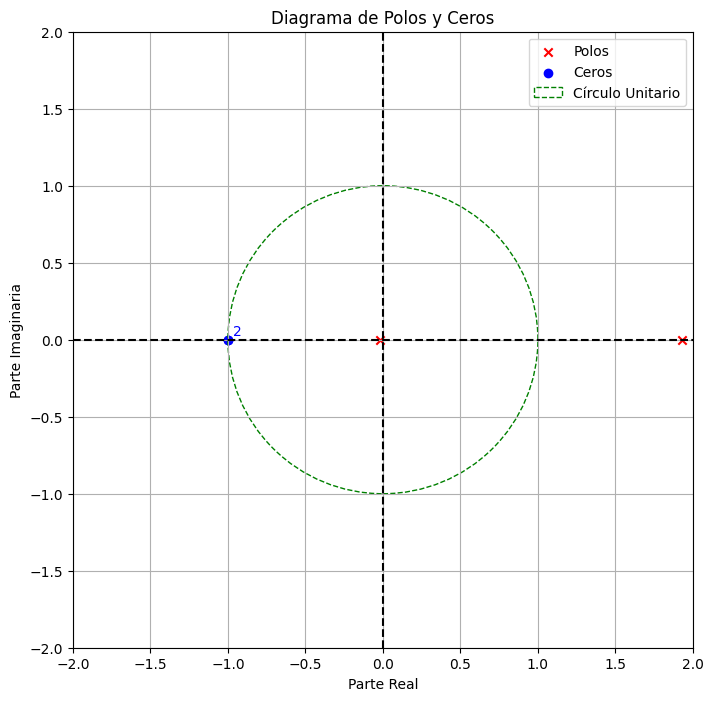

Polos:
[ 1.93272675 -0.02150052]
Zeros:
[-1. -1.]


In [61]:
#Plot PZMap
sysPB_fs100.printPZMap()

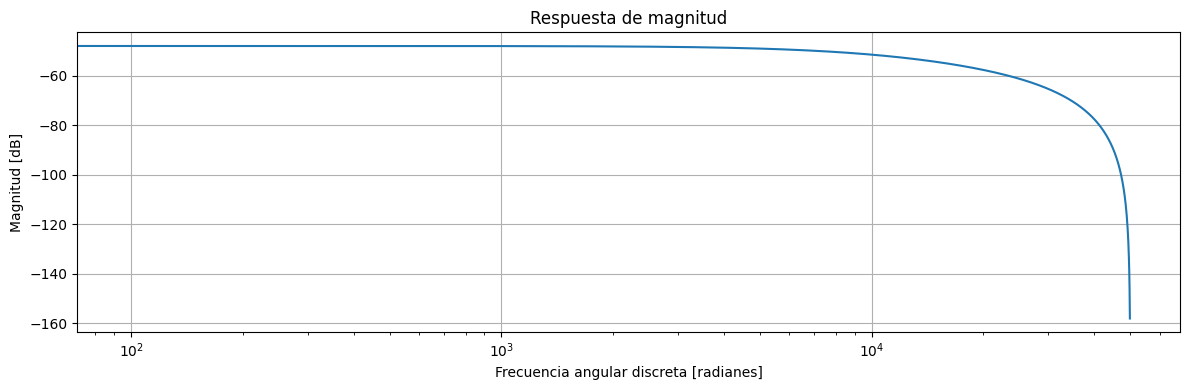

In [29]:
#Plot Module
sysPB_fs100.printModule()

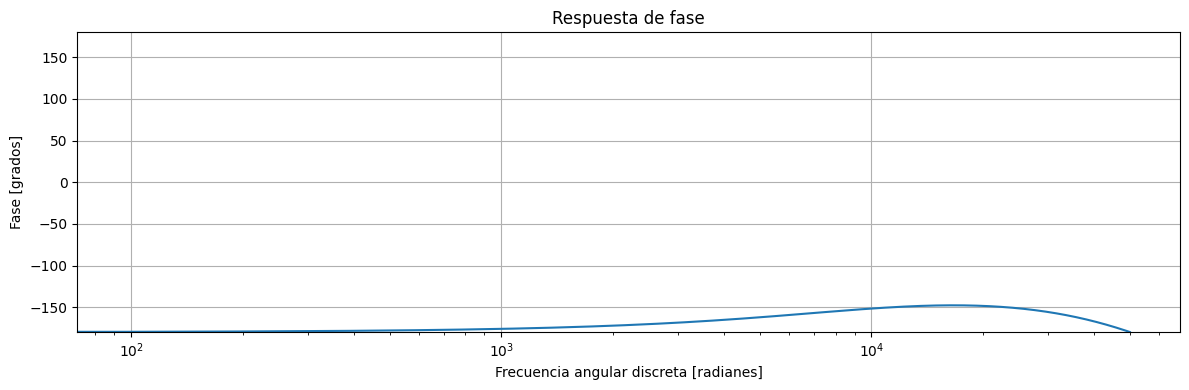

In [30]:
#Plot Phase
sysPB_fs100.printPhase()

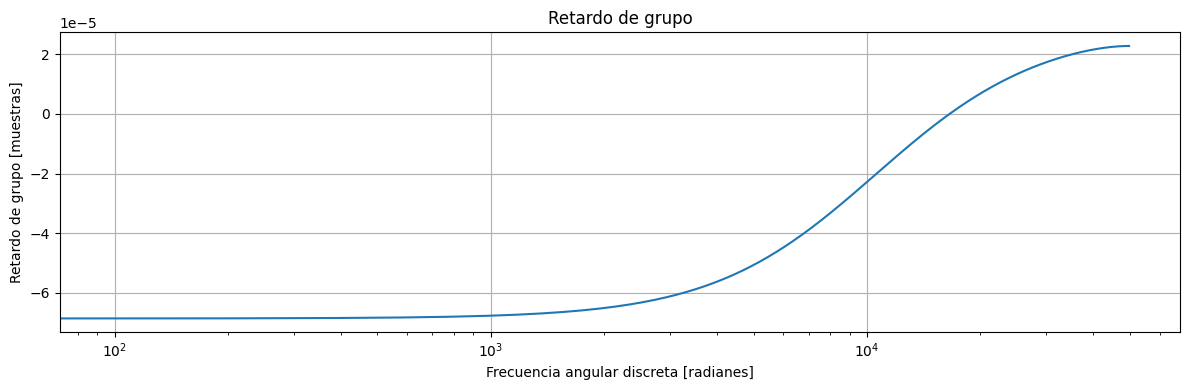

In [31]:
#Plot Group Delay
sysPB_fs100.printGroupDelay()

### Simulo Filtro Pasa-Bajos con fs=10 kHz y fc=1 kHz

In [32]:
#Defino coeficientes
fs=10000
fc=1000
w0=np.pi*2*fc
k=2*fs

num = [
      w0**2,
      2*w0**2,
      w0**2
]

den = [
    k**2+w0*k*np.sqrt(2)+w0**2,
    w0**2-2*k**2,
    w0**2-k*w0*np.sqrt(2)
]

sysPB_fs10 = SysZ(num,den,fs)

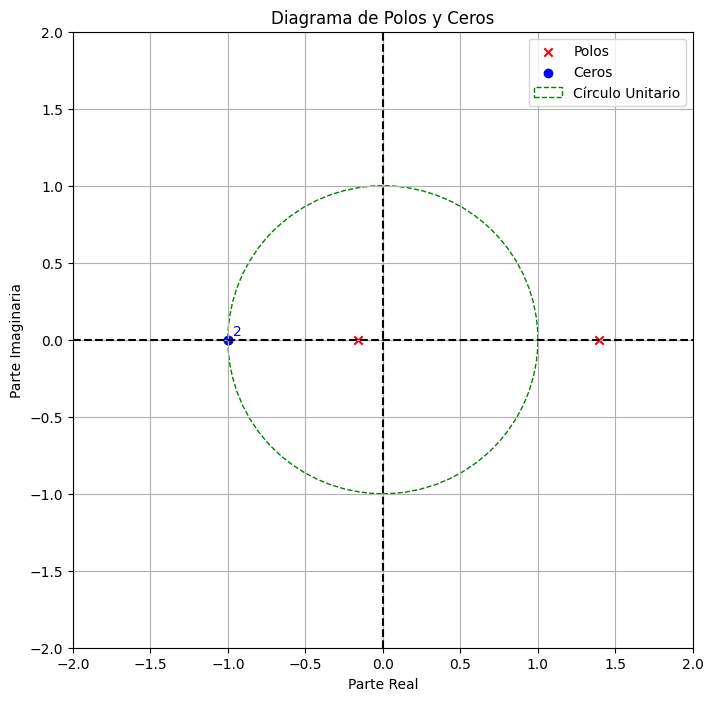

Polos:
[ 1.39301095 -0.16078589]
Zeros:
[-1. -1.]


In [33]:
#Plot PZMap
sysPB_fs10.printPZMap()

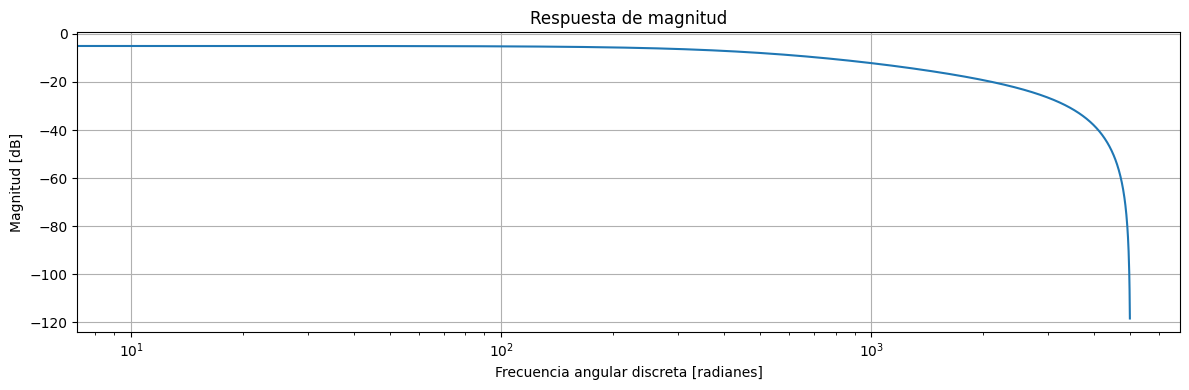

In [34]:
#Plot Module
sysPB_fs10.printModule()

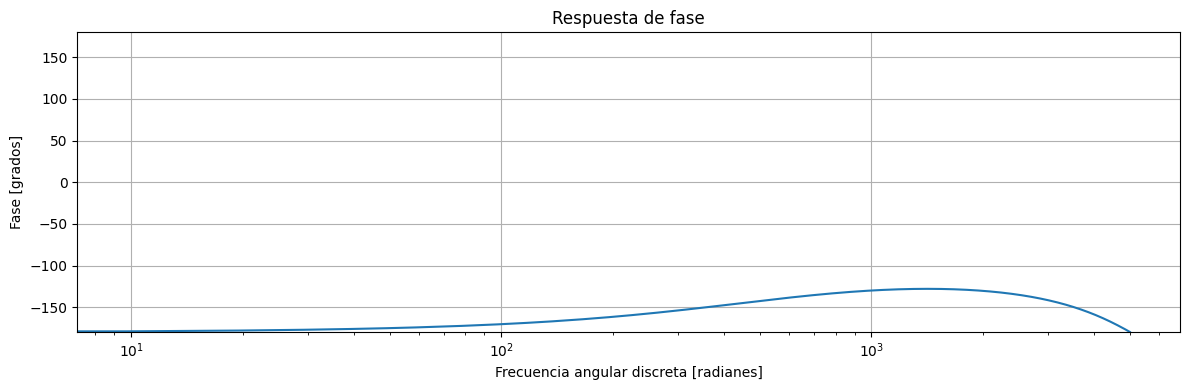

In [35]:
#Plot Phase
sysPB_fs10.printPhase()

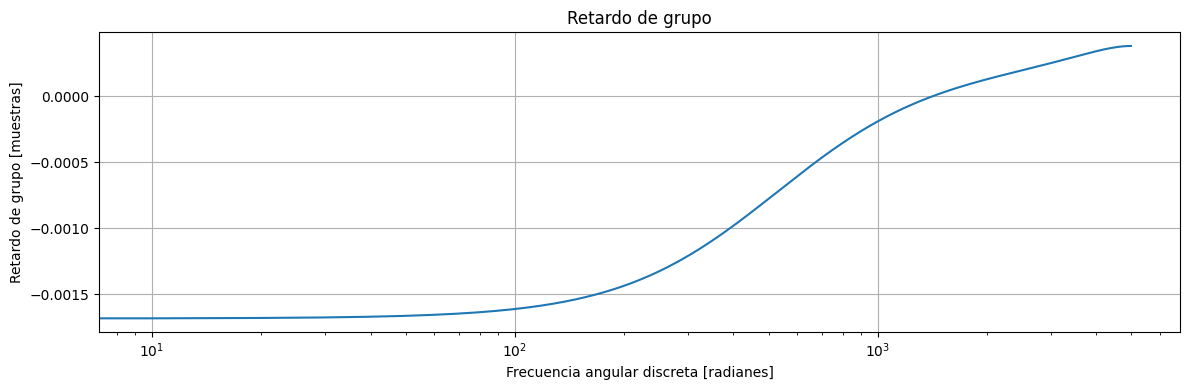

In [37]:
#Plot Group Delay
sysPB_fs10.printGroupDelay()

### Simulo Filtro Pasa-Altos con fs=100 kHz y fc=6 kHz

In [38]:
#Defino coeficientes
fs=100000
fc=6000
w0=np.pi*2*fc
k=2*fs

num = [
      k**2,
      -2*k**2,
      k**2
]

den = [
    k**2+w0*k*np.sqrt(2)+w0**2,
    w0**2-2*k**2,
    w0**2-k*w0*np.sqrt(2)
]

sysPA_fs100 = SysZ(num,den,fs=fs)

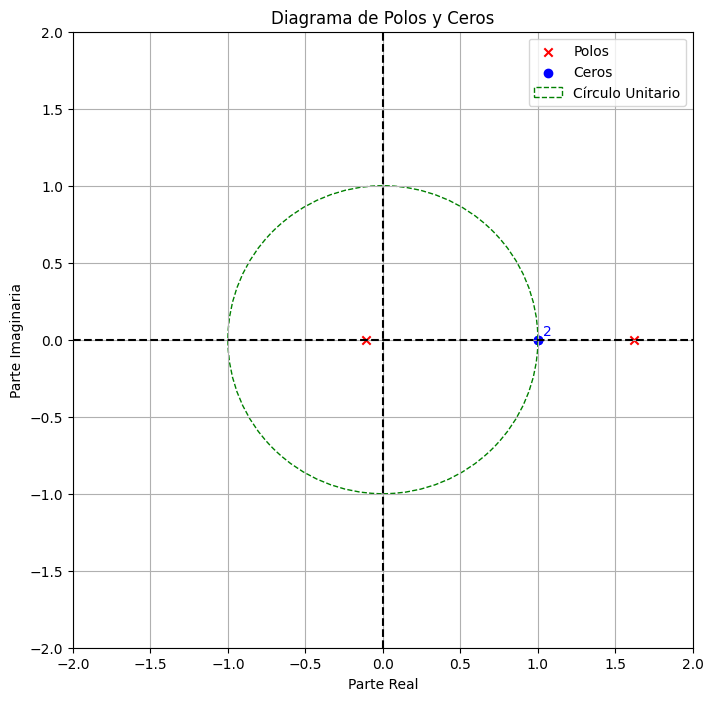

Polos:
[ 1.61833153 -0.10964243]
Zeros:
[1. 1.]


In [39]:
#Plot PZMap
sysPA_fs100.printPZMap()

<ipython-input-21-c55aa20629ae>:93: RuntimeWarning: divide by zero encountered in log10
  plt.semilogx(self.w, 20 * np.log10(self.mag))


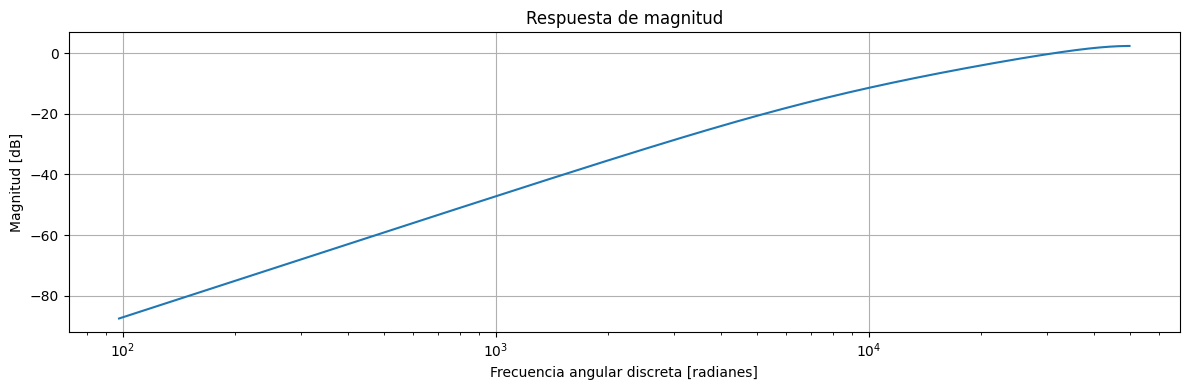

In [40]:
#Plot Module
sysPA_fs100.printModule()

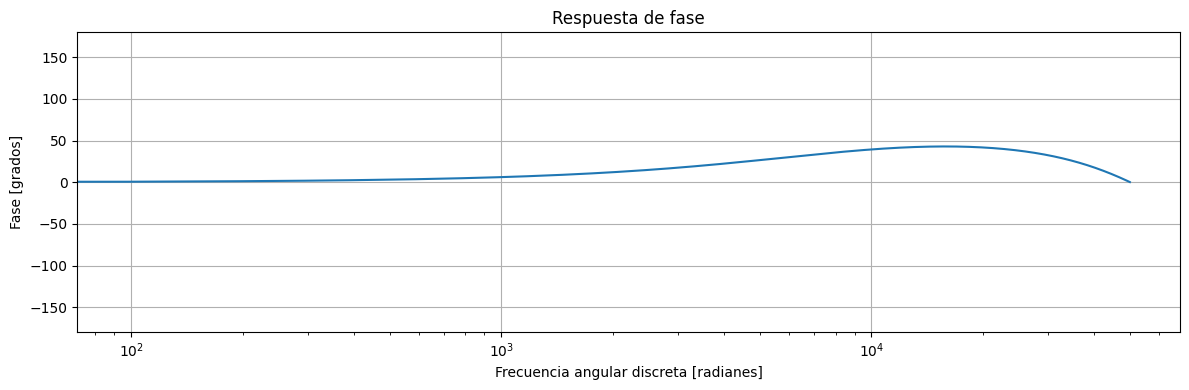

In [41]:
#Plot Phase
sysPA_fs100.printPhase()

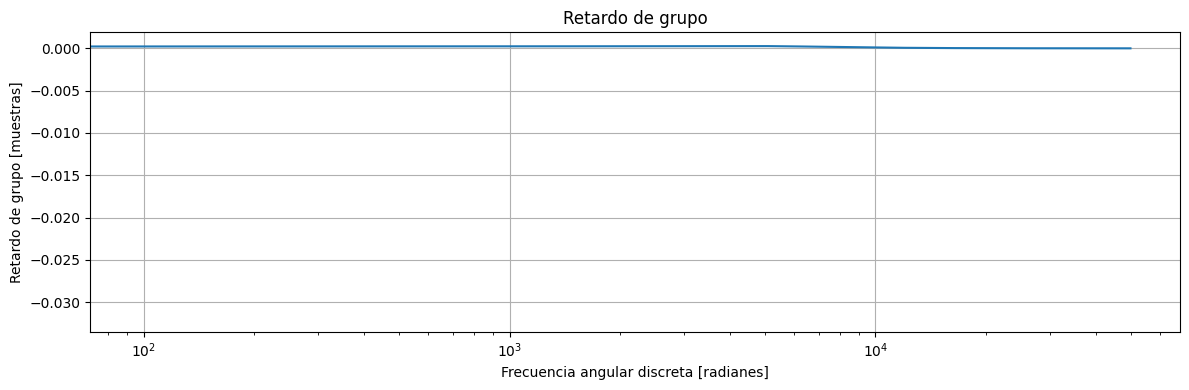

In [18]:
#Plot Group Delay
sysPA_fs100.printGroupDelay()

### Simulo Filtro Pasa-Altos con fs=10 kHz y fc=6 kHz

In [48]:
#Defino coeficientes
fs=10000
fc=6000
w0=np.pi*2*fc
k=2*fs

num = [
      k**2,
      -2*k**2,
      k**2
]

den = [
    k**2+w0*k*np.sqrt(2)+w0**2,
    2*w0**2-2*k**2,
    w0**2-k*w0*np.sqrt(2)
]

sysPA_fs10 = SysZ(num,den,fs=fs)

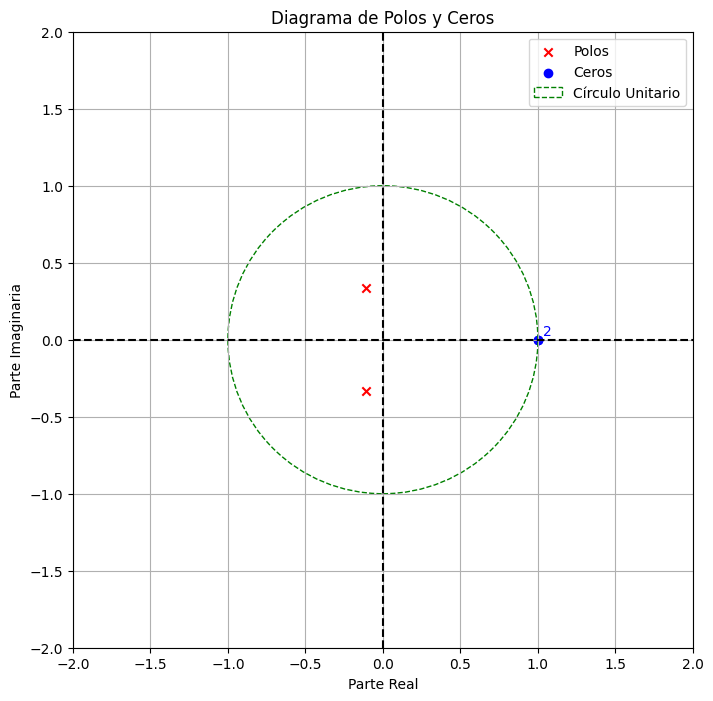

Polos:
[-0.10757053+0.3336882j -0.10757053-0.3336882j]
Zeros:
[1. 1.]


In [49]:
#Plot PZMap
sysPA_fs10.printPZMap()

<ipython-input-21-c55aa20629ae>:93: RuntimeWarning: divide by zero encountered in log10
  plt.semilogx(self.w, 20 * np.log10(self.mag))


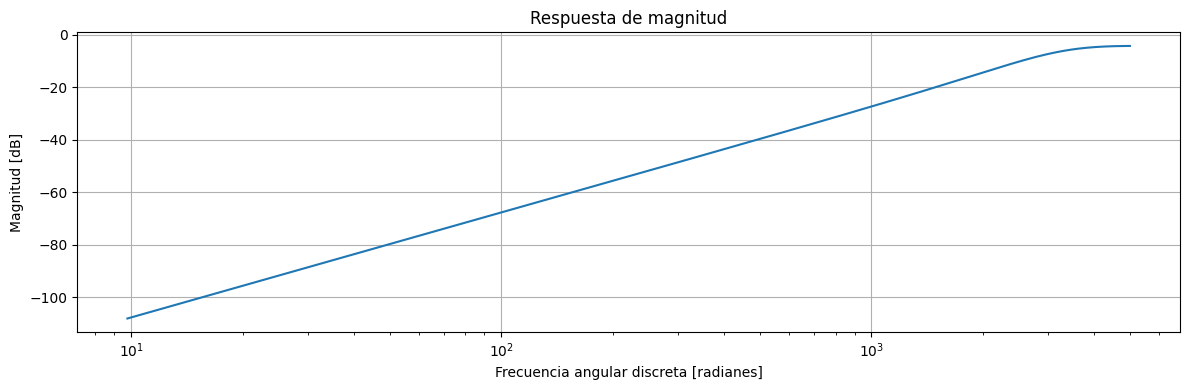

In [51]:
#Plot Module
sysPA_fs10.printModule()

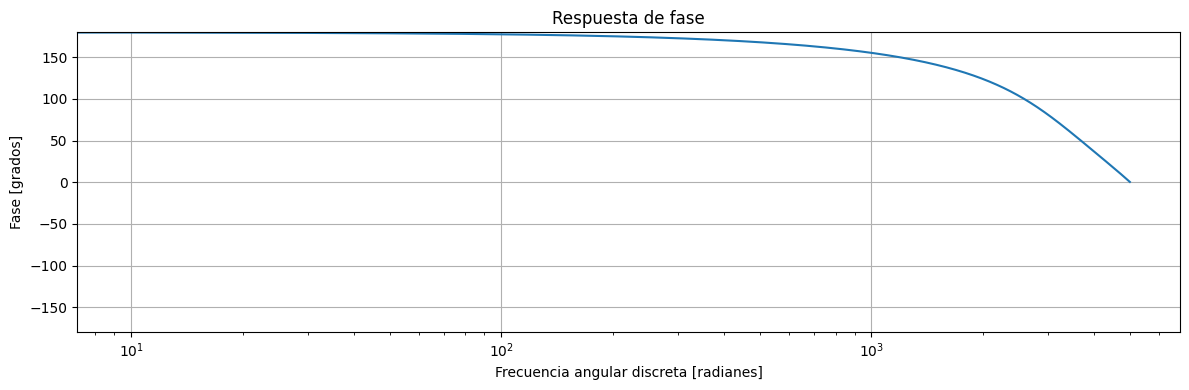

In [52]:
#Plot Phase
sysPA_fs10.printPhase()

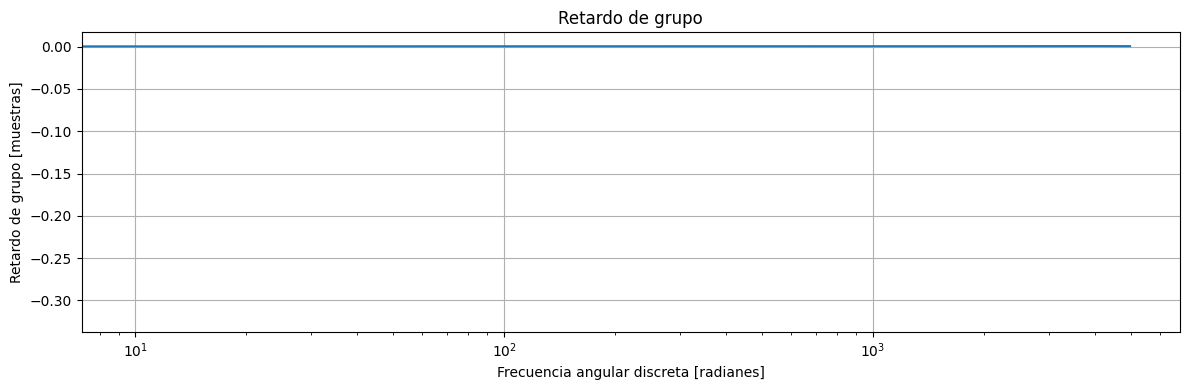

In [53]:
#Plot Group Delay
sysPA_fs10.printGroupDelay()

### Análisis prewarping
#### Marco teórico
El prewarping es una solución que nace a partir de que cuando se hace una transformada bilineal, las frecuencias no se mapean linealmente del espectro analógico al espectro discreto.

Aspectos a recordar:

Dominio \$ -> transformada bilineal -> Dominio Z

Las bajas frecuencias en Z corresponden a las bajas frecuencias en \$
Las altas frecuencias en Z corresponden a las altas frecuencias en \$

Sin embargo, en las altas frecuencias se nota la alinealidad de la trasnformación.
Particularmente, se cumple que las bajas frecuencias se mapean aproximadamente lineales, pero las altas están más comprimidas, es decir, a medida que aumenta Z en las altas frecuencias, proporcionalemnte involucran a un rango mucho mayor en \$.

Otro aspecto a recordar:
En \$: (0; Nyquist)
Se proyecta en z como: (0; +pi)

Entonces si queremos analizar qué ocurre con las frecuencias cercanas a Nyquist, al hacer pequeñas variaciones en Z implicarán grandes variaciones en \$.

A fines conceptuales, con la técnica de prewarping podemos "elegir" qué parte del espectro de \$ se representa con "buena resolución" en Z.
Matemáticamente lo que hacemos con esta técnica es deformar intencionalmente la frecuencia de interés de tal manera que luego de pasar por la transformada bilineal termine quedando lo más lineal posible.

Cumpliendo con esta ecuación, vamos a tener una buena resolución en la frecuencia de prewarping, entonces debemos ajustar Fs al valor correspondiente:

\begin{equation}
f_{prewarping} = \cfrac{2 fs}{π} tan(π\cfrac{fprewarping}{fs})
\end{equation}

Esta técnica tiene sentido cuando queremos analizar frecuencias cercanas a la frecuencia de muestreo (o frecuencia de Nyquist)

#### Aplicación práctica
En este caso es conveniente utilizar prewarping en el filtro pasa-altos con fs=10kHz. Esto es así dado que fc=6kHz y por lo tanto es una frecuencia cercana a Nyquist (10kHz).

## Ejercicio 2
Dadas las siguientes respuestas al impulso se pide:
- Transferencia del sistema 𝐻(𝑧)
- Singularidades en el plano 𝑧
- Respuesta de módulo y fase

a) Filtro de media móvil (moving average).

ℎ1(𝑘)=(1,1) significa ℎ(0)=1 y ℎ(1)=1

ℎ2(𝑘)=(1,1,1)

1. ¿Qué modificación debería implementarse para que la salida representa la media aritmética?
2. Para el último sistema, ¿qué frecuencia de muestreo se debería adoptar si se quisiera eliminar con dicho filtro la interferencia causada por la frecuencia de línea de 50 Hz?

b) Filtro diferenciador

ℎ1(𝑘)=(1,− 1) de primer orden

ℎ2(k)=(1,0,-1) de segundo orden

1. ¿Qué demora introducen ambos sistemas?
2. Hasta qué frecuencias estos sistemas se comportan como un derivador ideal. Considere una tolerancia admisible del 5% respecto a su respuesta ideal |𝐻(Ω)| = Ω.

### Filtro primediador 1

In [62]:
#Armo sistema 1
num = [1,1]
den = [1,0]
sysProm1 = SysZ(num, den, 1)

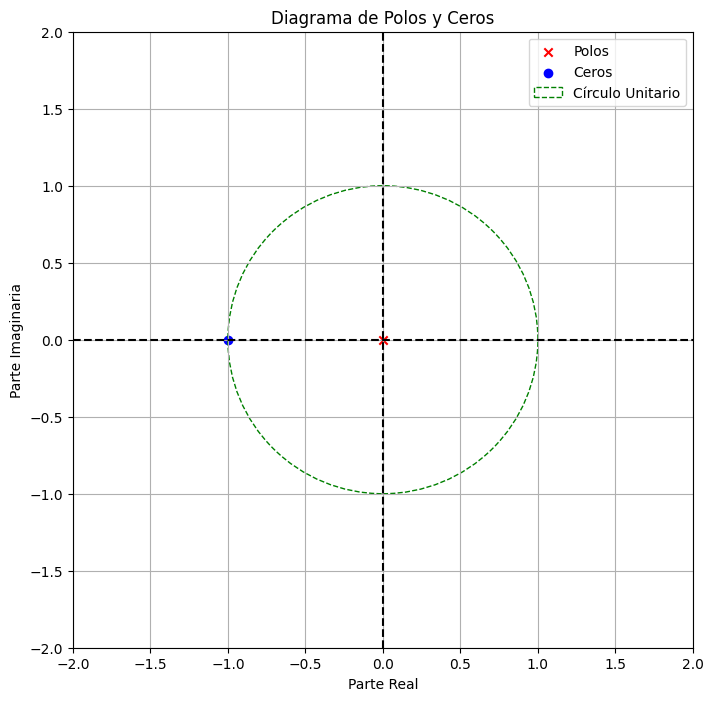

Polos:
[0.]
Zeros:
[-1.]


In [63]:
#Plot PZMap
sysProm1.printPZMap()

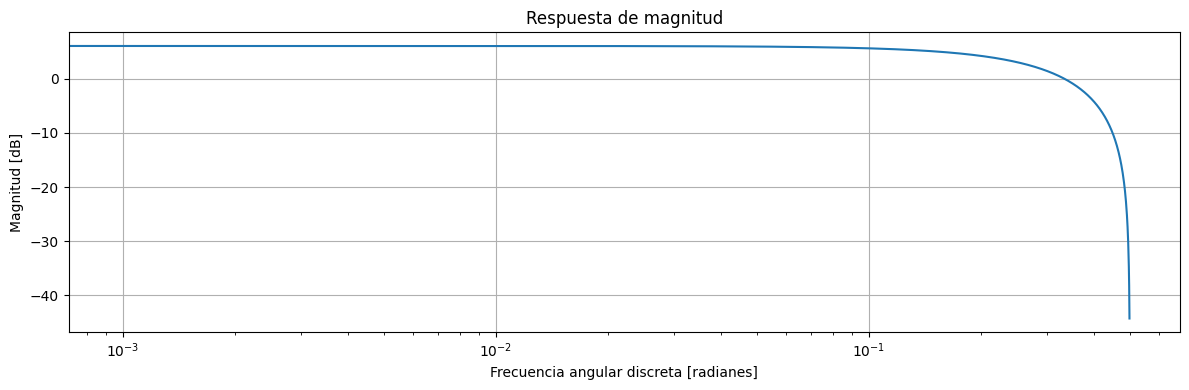

In [64]:
#Plot modulo
sysProm1.printModule()

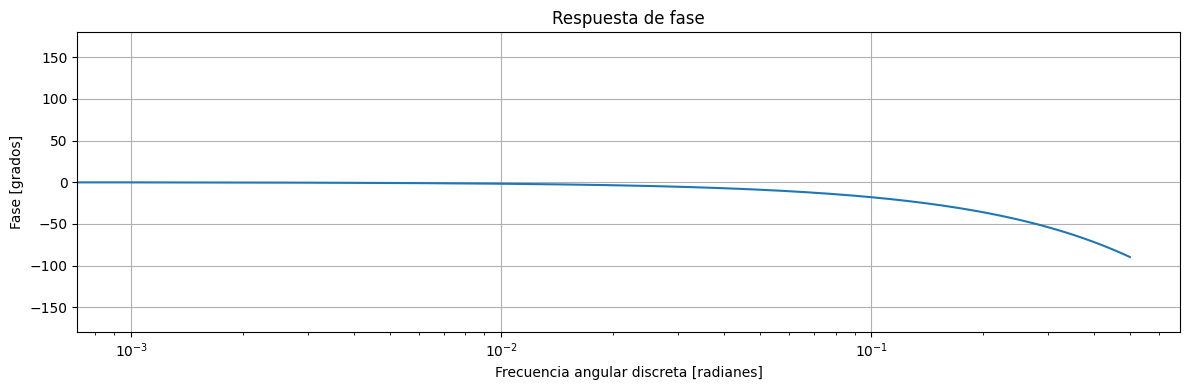

In [65]:
#Plot fase
sysProm1.printPhase()

### Filtro primediador 2

In [66]:
#Armo sistema 2
num = [1,1,1]
den = [1,0,0]
sysProm2 = SysZ(num, den, 1)

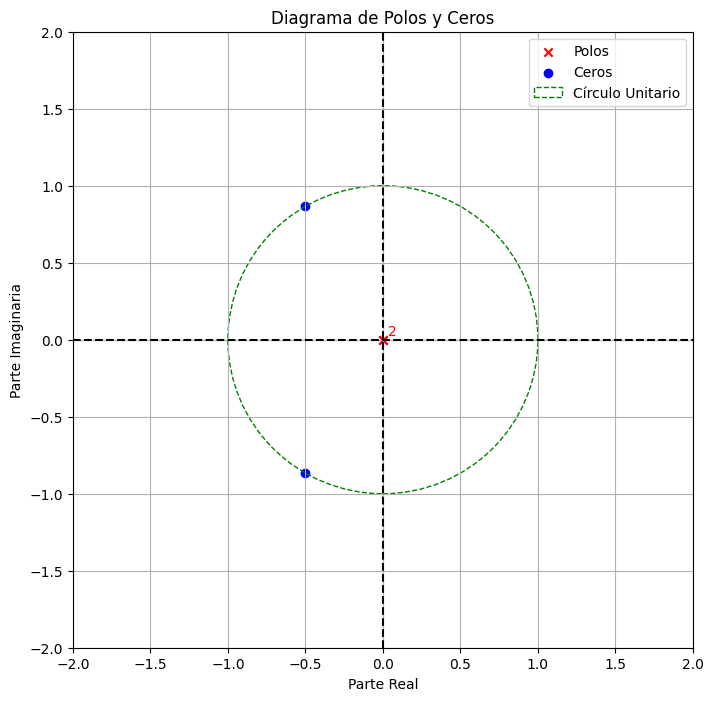

Polos:
[0. 0.]
Zeros:
[-0.5+0.8660254j -0.5-0.8660254j]


In [67]:
#Plot PZMap
sysProm2.printPZMap()

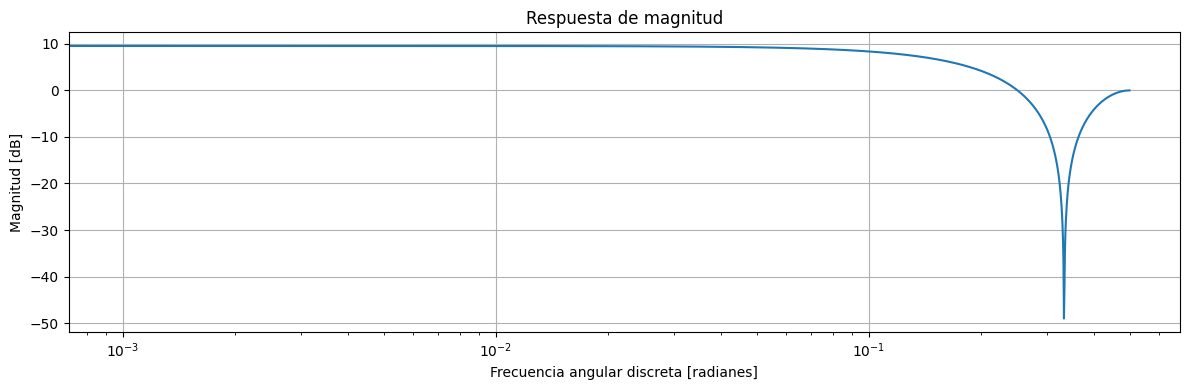

In [68]:
#Plot modulo
sysProm2.printModule()

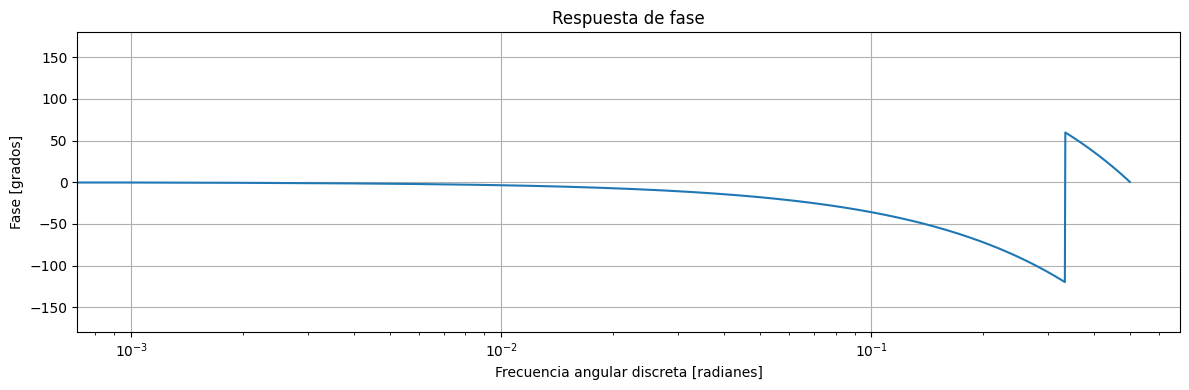

In [69]:
#Plot fase
sysProm2.printPhase()

### Preguntas Teóricas Promediador

**1. ¿Qué modificación debería implementarse para que la salida representa la media aritmética?**

Para este tipo de sistemas donde todos los coeficientes son iguales se cumple que:

\begin{equation}
y(k)=\sum_{i=0}^{N-1}x(k-i)b_i
\end{equation}
Donde:

N: cantidad de muestras totales

Por lo tanto si cada bi=1/N podemos sacarlo factor común y termina quedando exacamente la media aritmética:
\begin{equation}
y(k)=(1/N)\sum_{i=0}^{N-1}x(k-i)
\end{equation}

Es decir, deberíamos implementar filtros así:

h1=(1/2, 1/2)

h2=(1/3, 1/3)

**2. Para el último sistema, ¿qué frecuencia de muestreo se debería adoptar si se quisiera eliminar con dicho filtro la interferencia causada por la frecuencia de línea de 50 Hz?**

Analizando el diagrama de polos y ceros, podemos ver que los ceros se encuentran en:
\begin{equation}
z = 1 ∠ ±(2/3π)rad
\end{equation}

Por otro lado:
\begin{equation}
w = k*tan(Ω/2)
\end{equation}

\begin{equation}
k = 2 f_s
\end{equation}

Frecuencia a eliminar:
\begin{equation}
w = 2π*50Hz
\end{equation}

Ubicacion del cero:
\begin{equation}
Ω = (2/3π)rad
\end{equation}

Reemplazando:
\begin{equation}
k=\cfrac{w}{tan(Ω/2)}
\end{equation}

\begin{equation}
k=\cfrac{2π 50 Hz}{\sqrt{3}}
\end{equation}

\begin{equation}
fs=\cfrac{2π 50 Hz}{2\sqrt{3}} ≈ 90.68 Hz
\end{equation}

### Filtro diferenciador 1

In [70]:
#Formo diferenciador 1
num=[1,-1]
den=[1,0]
sysDif1 = SysZ(num,den,1)

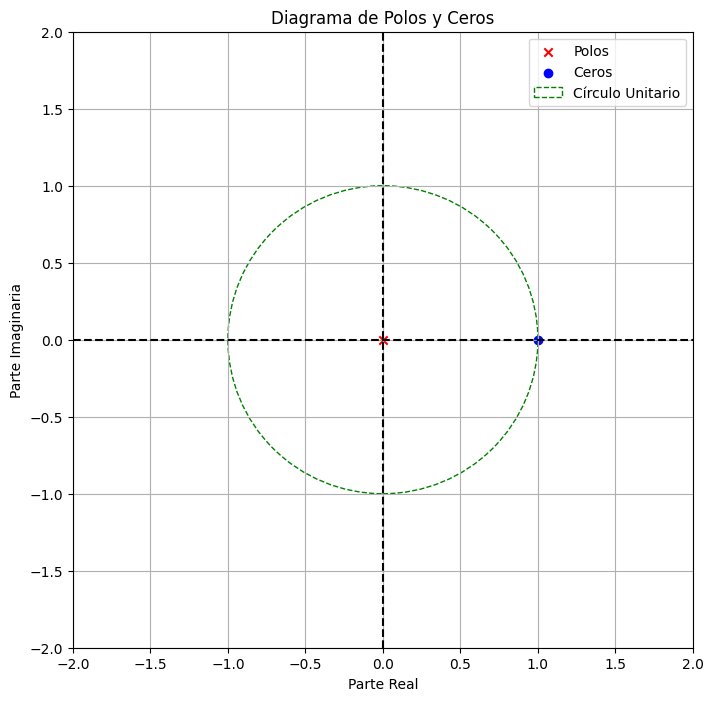

Polos:
[0.]
Zeros:
[1.]


In [71]:
#Plot PZMap
sysDif1.printPZMap()

<ipython-input-21-c55aa20629ae>:93: RuntimeWarning: divide by zero encountered in log10
  plt.semilogx(self.w, 20 * np.log10(self.mag))


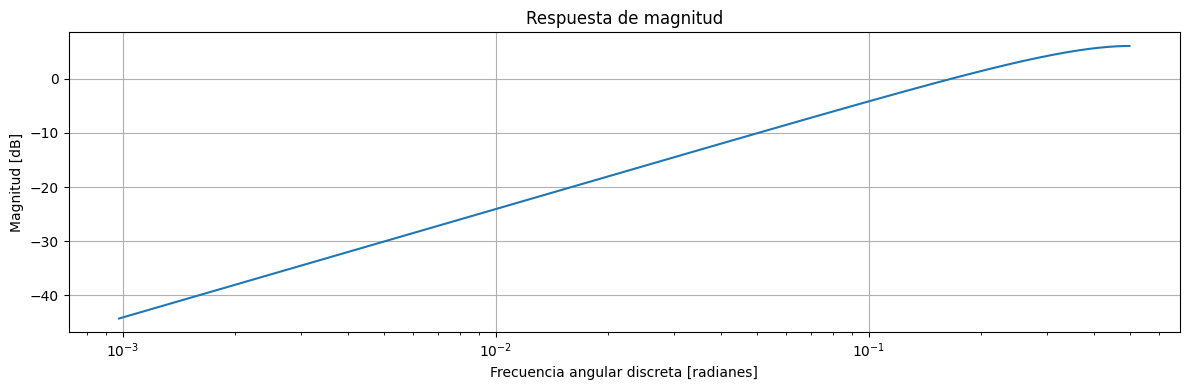

In [72]:
#Plot modulo
sysDif1.printModule()

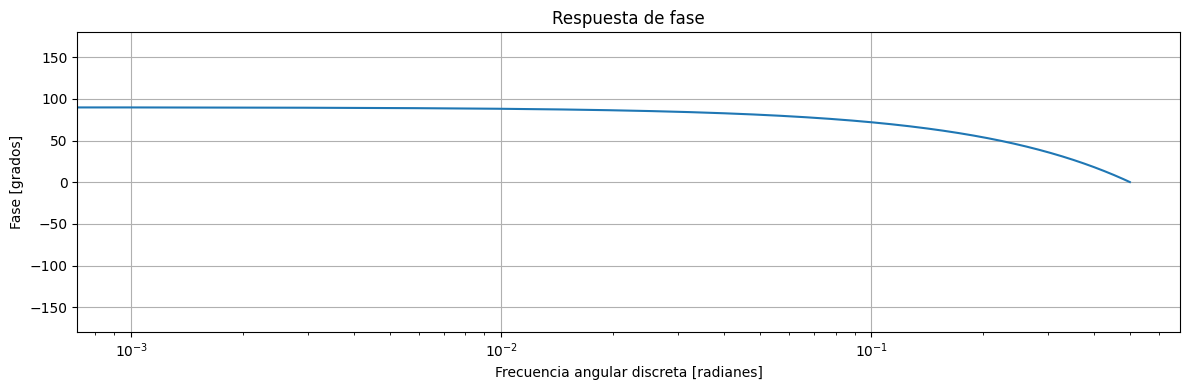

In [73]:
#Plot fase
sysDif1.printPhase()

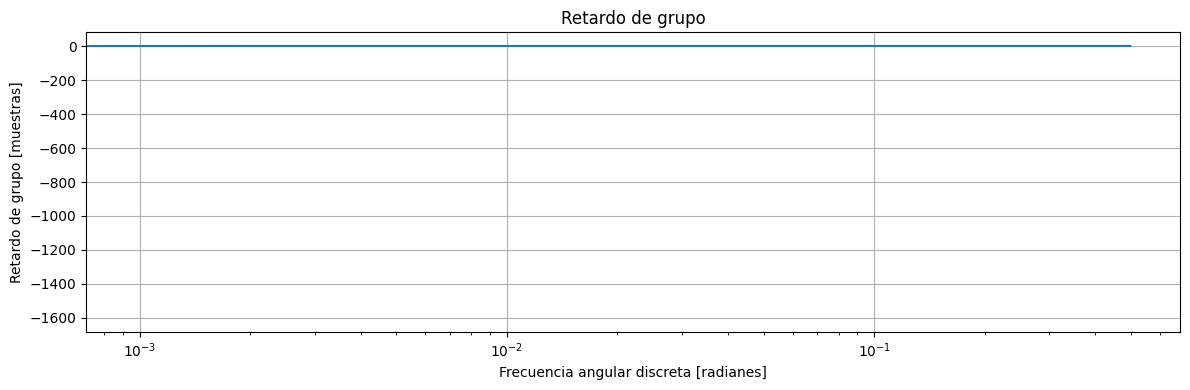

In [75]:
#Plot fase
sysDif1.printGroupDelay()

### Filtro diferenciador 2

In [76]:
#Formo diferenciador 1
num=[1,0,-1]
den=[1,0,0]
sysDif2 = SysZ(num,den,1)

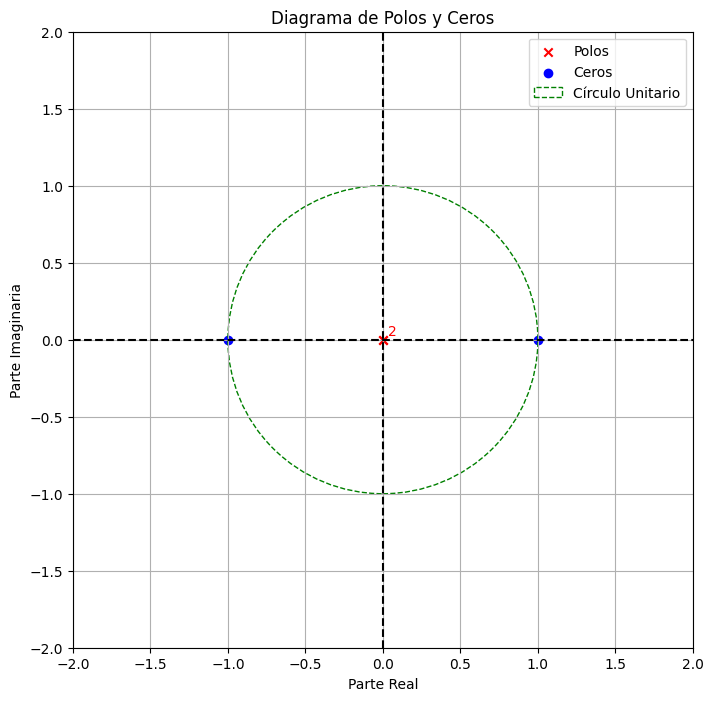

Polos:
[0. 0.]
Zeros:
[-1.  1.]


In [77]:
#Plot PZMap
sysDif2.printPZMap()

<ipython-input-21-c55aa20629ae>:93: RuntimeWarning: divide by zero encountered in log10
  plt.semilogx(self.w, 20 * np.log10(self.mag))


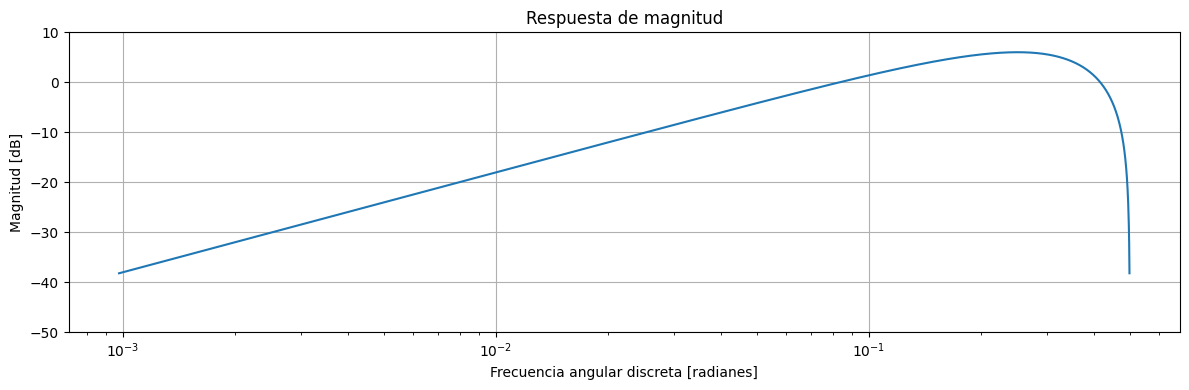

In [78]:
#Plot modulo
sysDif2.printModule(ylim=(-50,10))

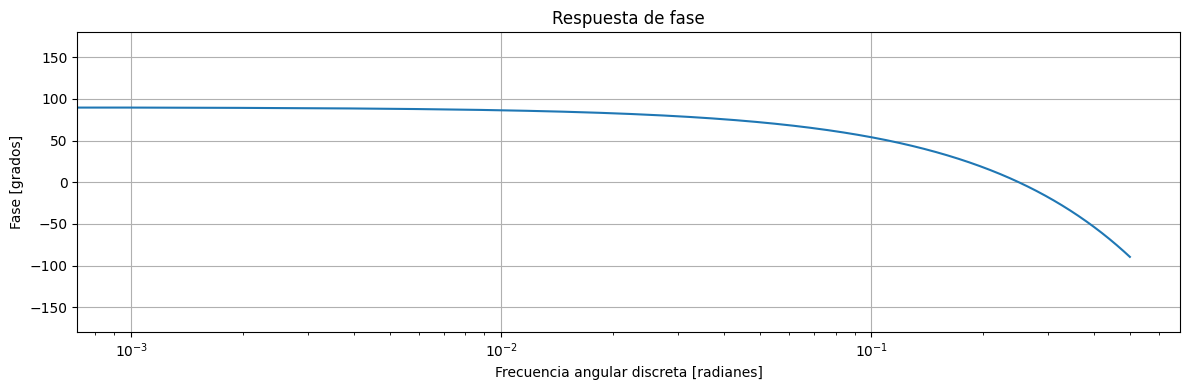

In [79]:
#Plot fase
sysDif2.printPhase()

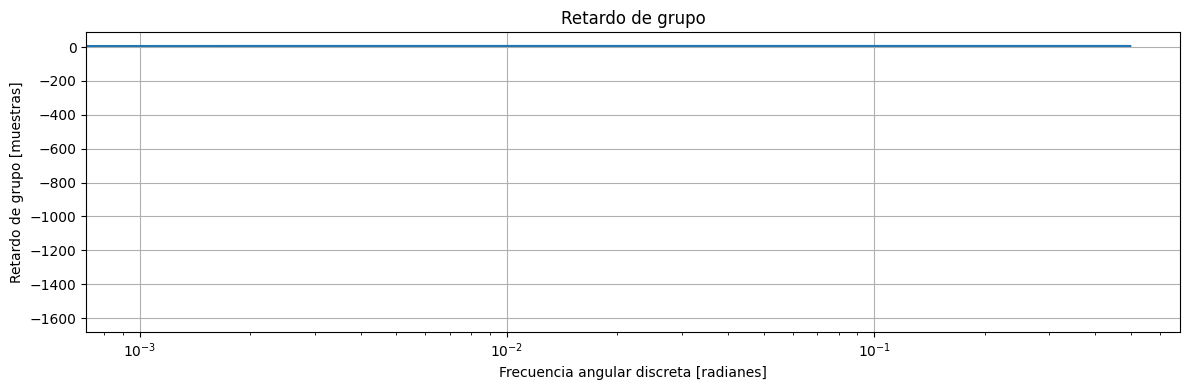

In [81]:
#Plot fase
sysDif2.printGroupDelay()

### Preguntas Teóricas Diferenciador  

**1. ¿Qué demora introducen ambos sistemas?**

El primero tiene un retardo de grupo de 0.5 muestras mientras que el segundo tiene un retardo de 1 muestra.
Siempre conviene tener un retardo entero dado que si tenemos un retardo fraccionario, el sistema pierde determinismo.

**2. Hasta qué frecuencias estos sistemas se comportan como un derivador ideal. Considere una tolerancia admisible del 5% respecto a su respuesta ideal |𝐻(Ω)| = Ω.**

**Transferencia 1:**

**Transferencia 2:**


### Transformo de apertura angular en Z a velocidad angular en S


## Ejercicio 3
Se dispone del siguiente filtro digital:
![image.png](attachment:image.png)

a) Para la transferencia del filtro con M = 2 y α=0.8; calcular:

1) Diagrama de polos y ceros

2) Respuesta en módulo

3) Respuesta en Fase

4) Retardo de grupo.

b) Si quisiéramos anular una senoidal interferente de 125 Hz y su segunda armónica, y sólo dispone de un sumador y el filtro de la figura con M = 4. Proponga un esquema de la solución y calcule los parámetros del filtro que sería necesario adecuar.